In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D

In [2]:
train_dir=r'C:\Users\sande\Downloads\cats_and_dogs_small\train'
validation_dir=r'C:\Users\sande\Downloads\cats_and_dogs_small\validation'
test_dir=r'C:\Users\sande\Downloads\cats_and_dogs_small\test'

In [ ]:
#The accuracy can be improved by data augmentation
#Insted of building models we can use pretrained models which will give better accuracy, since they are proven models

In [3]:
#preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

#To generate Tensors in range[0,1]
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
#Loading Inception Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
conv_base = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [5]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
conv_base.trainable=False

In [8]:
from tensorflow.keras.optimizers import RMSprop

model= Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



In [9]:
model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [10]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, 
                                  steps_per_epoch = 100, epochs = 5)


Epoch 1/5
100/100 [==============================] - 1286s 13s/step - loss: 0.7699 - acc: 0.6840 - val_loss: 0.2411 - val_acc: 0.9450
Epoch 2/5
100/100 [==============================] - 2973s 30s/step - loss: 0.5609 - acc: 0.7590 - val_loss: 0.1982 - val_acc: 0.9650
Epoch 3/5
100/100 [==============================] - 502s 5s/step - loss: 0.5224 - acc: 0.7680 - val_loss: 0.2316 - val_acc: 0.9540
Epoch 4/5
100/100 [==============================] - 558s 6s/step - loss: 0.5019 - acc: 0.7700 - val_loss: 0.2145 - val_acc: 0.9470
Epoch 5/5
100/100 [==============================] - 597s 6s/step - loss: 0.4781 - acc: 0.7885 - val_loss: 0.4484 - val_acc: 0.9140


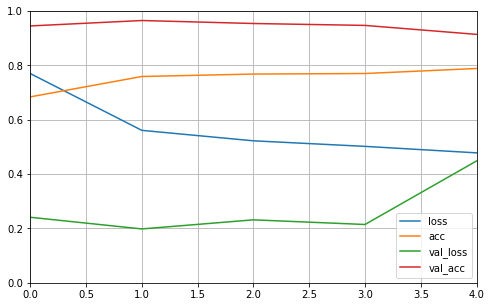

In [11]:
pd.DataFrame(inc_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 939 images belonging to 2 classes.


In [13]:
model.evaluate_generator(test_generator, steps=50)

[0.5011351224128157, 0.9169169]